In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import time

from models.conv_nets import make_convNet 
from utils.train_utils import timer, inverse_squareroot_lr, train_conv_nets
from utils.visualizations import plot_loss_from_file


# keeps tensorflow from using all available GPU memory when a model is initialized.
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [ ]:
data_set = 'cifar10'
batch_size=128
convnet_depth = 5
convnet_widths = [10]
label_noise=20

results = train_conv_nets(
    data_set = data_set,
    convnet_depth = convnet_depth,
    convnet_widths = convnet_widths,
    label_noise_as_int = label_noise,
    n_batch_steps = 80000,
    optimizer = "SGD",
    data_save_path_suffix="")

In [3]:
t0 = time.clock()

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


# apply label noise to the data set
if 0 < 0.2:
    random_idx = np.random.choice(
        x_train.shape[0], int(0.2 * x_train.shape[0])
    )
    rand_labels = np.random.randint(
        low=y_train.min(), high=y_train.max(), size=len(random_idx)
    )
    y_train[random_idx] = np.expand_dims(rand_labels, axis=1)

temp = np.zeros((50000,32,32,3))
for i in range(50000):
    for j in range(32):
        for k in range(32):
            for l in range(3):
                temp[i][j][k][l] = x_train[i][j][k][l]/255

temp1 = np.zeros((50000,32,32,3))
for i in range(50000):
    if np.random.randint(0,2) > 0.5:
        for j in range(32):
            for k in range(32):
                for l in range(3):
                    temp1[i][j][31-k][l] = temp[i][j][k][l]
    else:
        for j in range(32):
            for k in range(32):
                for l in range(3):
                    temp1[i][j][k][l] = temp[i][j][k][l]

t1 = time.clock()-t0
print(t1)

temp2 = np.zeros((50000,40,40,3))+0.5
for i in range(50000):
    for j in range(32):
        for k in range(32):
            for l in range(3):
                temp2[i][4+j][4+k][l] = temp1[i][j][k][l]

t2 = time.clock()-t0
print(t2)

temp3 = np.zeros((50000,32,32,3))
for i in range(50000):
    if np.random.randint(0,2) > 0.5:
        len_cut = np.random.randint(0,9)
        wid_cut = np.random.randint(0,9)
        temp3[i] = temp2[i,len_cut:len_cut+32,wid_cut:wid_cut+32]
    else:
        temp3[i] = temp2[i,4:36,4:36]
        
t3 = time.clock()-t0
print(t3)

/home/ecbm4040/anaconda3/envs/envTF22/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/home/ecbm4040/anaconda3/envs/envTF22/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


782.586778


/home/ecbm4040/anaconda3/envs/envTF22/lib/python3.7/site-packages/ipykernel_launcher.py:46: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


995.026636
996.129631


/home/ecbm4040/anaconda3/envs/envTF22/lib/python3.7/site-packages/ipykernel_launcher.py:58: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


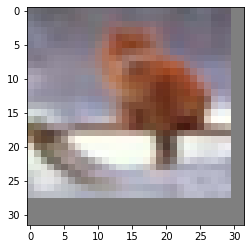

In [21]:
plt.imshow(temp3[12450])